### Data Science Jobs in USA

In [6]:
%load_ext blackcellmagic

The blackcellmagic extension is already loaded. To reload it, use:
  %reload_ext blackcellmagic


In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import pprint
import json


# Import API key
from api_keys import api_key_usajobs

# Output File (CSV)
output_data_file = "jobs.csv"

In [12]:
url = "https://data.usajobs.gov/api/codelist/occupationalseries"
r = requests.get(url)
if r.status_code == 200:
    r_json = r.json()

    my_list = r_json["CodeList"][0]["ValidValue"]
    jobtitles = {}
    for d in my_list:
        for k, v in d.items():
            jobtitles[d["Value"]] = d["Code"]
else:
    print("Error")
col1 = []
col2 = []
for k, v in jobtitles.items():
    col1.append(k)
    col2.append(v)

d = {"Job titles": col1, "Code": col2}
df = pd.DataFrame(data=d)
df.to_csv(output_data_file)

col1 = []
col2 = []
print(df.sort_values(by=["Job titles"]))
for k, v in jobtitles.items():
    if ("Engineering" in k) or ("Data" in k) or ("Coding" in k) or ("Computer" in k):
        col1.append(k)
        col2.append(v)

d = {"Job titles": col1, "Code": col2}
df_selected = pd.DataFrame(data=d)


                          Job titles  Code
730                      Able Seaman  9924
731          Able Seaman-Maintenance  9925
139                       Accounting  0510
142            Accounting Technician  0525
350                Actuarial Science  1510
..                               ...   ...
44             Workforce Development  0142
43   Workforce Research And Analysis  0140
275              Writing And Editing  1082
796               Yeoman-Storekeeper  9998
109                          Zoology  0410

[798 rows x 2 columns]


In [13]:
def get_jobs_json(Keyword, JobCategoryCode, api_key):
    url = "https://data.usajobs.gov/api/search"
    host = "data.usajobs.gov"

    r = requests.get(
        url,
        headers = {
            "Host": host,
            "User-Agent": "pratima.gokhale@gmail.com",
            "Authorization-Key": api_key_usajobs,
        },
        params={"Keyword": Keyword, "JobCategoryCode": JobCategoryCode},
    )
    
    if r.status_code == 200:
        r_json = r.json()
        return r_json
    else:
        return None

In [14]:
def clean_jobs(out_job):
    number_of_jobs = out_job["SearchResult"]["SearchResultCount"]
    print(number_of_jobs)
    my_list = out_job["SearchResult"]["SearchResultItems"]
    for e in my_list:
        for k, v in e.items():
            if k == "MatchedObjectDescriptor":
                cleaned_out_job.append(
                    {
                        "Job title": v["PositionTitle"],
                        "Location": v["PositionLocationDisplay"],
                    }
                )
    return(pd.DataFrame(cleaned_out_job))

In [15]:
# out_job = []
col3 = []

print("Beginning data retreival")
for code in df_selected["Code"]:
    out_job = get_jobs_json("Data", code, api_key)
    if out_job:
        # pprint.pprint(out_job["SearchResult"]["SearchResultItems"])
        number_of_jobs = out_job["SearchResult"]["SearchResultCountAll"]
        col3.append(number_of_jobs)
        
        #my_list = out_job["SearchResult"]["SearchResultItems"]

    else:
        print("job not found: skipping data")
col = pd.DataFrame(data = {"No.ofJobs":col3})
df_selected = df_selected.join(col)

Beginning data retreival
200
2
200
0
200
9
200
5
200
1
200
104
200
55
200
1
200
7
200
6
200
101
200
0
200
25
200
69
200
10
200
51
200
49
200
52
200
8
200
24
200
0
200
0
200
13
200
9
200
1
200
24
200
0
200
13
200
50
200
0
200
0
200
0
200
0
200
0
200
0


,Job titles,Code,No.ofJobs
0,Computer Operation,0332,2
1,Computer Specialist (FAA Only),0334,0
2,Computer Clerk And Assistant,0335,9
3,Data Transcriber,0356,5
4,Coding,0357,1
5,General Engineering,0801,104
6,Engineering Technical,0802,55
7,Safety Engineering,0803,1
8,Fire Protection Engineering,0804,7
9,Materials Engineering,0806,6


In [21]:
df_selected = df_selected.join(col)


In [35]:
df_new = df_selected.sort_values(by="No.ofJobs", ascending = False)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34],
 <a list of 35 Text major ticklabel objects>)

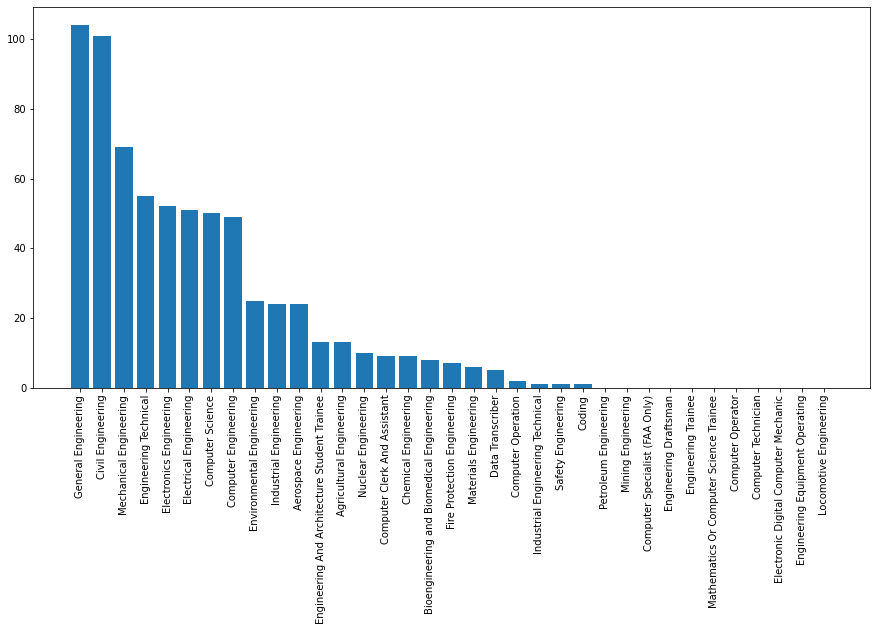

In [36]:
figsize_width = 15
figsize_height = 7
plt.figure(figsize = (figsize_width, figsize_height))
plt.bar(df_new["Job titles"],df_new["No.ofJobs"])
plt.xticks(rotation=90)